# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

A pix2pix model was trained to convert the map tiles into the satellite images.

# Что такое Pix2pix?

Это модель генеративно-состязательной сети(GAN) для преобразования изображения в изображение.

GAN состоит из двух частей: генератор и дискриминатор.
На вход дискриминатора поступают два типа изображение: из реального распределения и сгенерированные генератором. Дискриминатор производит классификацию. Благодаря наличию оптимизационной функции и метода обратного распространения ошибки, он учится классифицировать лучше. 

Генератор на входе получает шум. Преобразует. Выдает дискриминатору. Получает обратный ответ, насколько приближены сгенерированные изображения к реальному распределению. И тоже, благодаря функции потерь и методу обратного распространения ошибки, генератор обучается приближать свои выходы к реальным изображениям.

## Подготовка данных

Для начала мы скачаем датасет: maps.tar.gz.

In [1]:
! wget https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/maps.tar.gz

--2021-01-16 07:05:16--  https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/maps.tar.gz
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘maps.tar.gz’

maps.tar.gz         100%[===================>] 238.65M  4.36MB/s    in 53s     

2021-01-16 07:06:10 (4.46 MB/s) - ‘maps.tar.gz’ saved [250242400/250242400]



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Разархивируем .tar.gz файл

In [3]:
%cd /content

!tar -C /content -xvf /content/maps.tar.gz

/content
maps/
maps/train/
maps/train/1.jpg
maps/train/10.jpg
maps/train/100.jpg
maps/train/1000.jpg
maps/train/1001.jpg
maps/train/1002.jpg
maps/train/1003.jpg
maps/train/1004.jpg
maps/train/1005.jpg
maps/train/1006.jpg
maps/train/1007.jpg
maps/train/1008.jpg
maps/train/1009.jpg
maps/train/101.jpg
maps/train/1010.jpg
maps/train/1011.jpg
maps/train/1012.jpg
maps/train/1013.jpg
maps/train/1014.jpg
maps/train/1015.jpg
maps/train/530.jpg
maps/train/531.jpg
maps/train/532.jpg
maps/train/533.jpg
maps/train/534.jpg
maps/train/535.jpg
maps/train/536.jpg
maps/train/537.jpg
maps/train/538.jpg
maps/train/539.jpg
maps/train/54.jpg
maps/train/540.jpg
maps/train/541.jpg
maps/train/542.jpg
maps/train/543.jpg
maps/train/544.jpg
maps/train/545.jpg
maps/train/546.jpg
maps/train/547.jpg
maps/train/548.jpg
maps/train/549.jpg
maps/train/55.jpg
maps/train/550.jpg
maps/train/551.jpg
maps/train/552.jpg
maps/train/553.jpg
maps/train/554.jpg
maps/train/555.jpg
maps/train/556.jpg
maps/train/557.jpg
maps/train/5

In [4]:
import os

img_folder_path = 'maps/train'
dirListing = os.listdir(img_folder_path)

print("Number of train images: ", len(dirListing))

img_folder_path = 'maps/val'
dirListing = os.listdir(img_folder_path)

print("Number of validation images: ", len(dirListing))

Number of train images:  1096
Number of validation images:  1098


In [5]:
import matplotlib.pyplot as plt
img = plt.imread('maps/train/1.jpg')

print('Data Shape:',img.shape)

Data Shape: (600, 1200, 3)


Изображения имеют цифровое имя файла и находятся в формате JPEG. Каждое изображение имеет ширину 1200 пикселей и высоту 600 пикселей и содержит как спутниковое изображение слева, так и изображение Google Maps справа.

Подготовим изображения для обучения модели Pix2Pix. Каждое изображение будет загружено, масштабировано и разделено на элементы спутниковой карты и карты Google. В результате получится 1096 пар цветных изображений с шириной и высотой 256 × 256 пикселей.

Функция load_images () ниже реализует это. Он перечисляет список изображений в заданном каталоге, загружает каждое с целевым размером 256 × 512 пикселей, разбивает каждое изображение на элементы спутника и карты и возвращает массив каждого. После этого сохраняем подготовленные массивы в новый файл в сжатом формате для дальнейшего использования.

In [6]:
# load, split and scale the maps dataset ready for training
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

# load all images in a directory into memory
def load_images(path, size=(256,512)):
	src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# split into satellite and map
		sat_img, map_img = pixels[:, :256], pixels[:, 256:]
		src_list.append(sat_img)
		tar_list.append(map_img)
	return [asarray(src_list), asarray(tar_list)]

# dataset path
path = 'maps/train/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'maps_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)
Saved dataset:  maps_256.npz


Загружаем подготовленный набор тренировочных данных и посмотрим на несколько пар примеров.

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


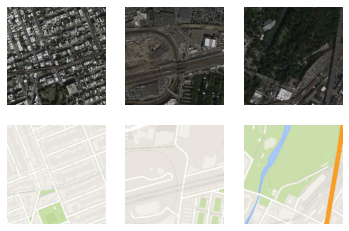

In [7]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('maps_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

## Разработка модели Pix2Pix

В этом разделе будет описана и исполнена архитектура модели Pix2Pix, которая будет на основе изображения со спутника предсказывать его образ на Google Maps.



In [8]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np


Архитектура состоит из двух моделей: дискриминатора и генератора.

Дискриминатор - это глубокая сверточная нейронная сеть, которая выполняет классификацию изображений. В частности, условная классификация изображений. Он принимает как исходное изображение (например, спутниковую фотографию), так и целевое изображение (например, изображение Google Maps) в качестве входных данных и предсказывает вероятность того, является ли целевое изображение реальным или поддельным переводом исходного изображения. Дизайн дискриминатора основан на эффективном воспринимающем поле модели, которое определяет отношение между одним выходом модели и количеством пикселей во входном изображении. Это называется моделью PatchGAN и тщательно спроектировано таким образом, чтобы каждое выходное предсказание модели соответствовало квадрату или фрагменту входного изображения размером 70 × 70.

Выходные данные модели зависят от размера входного изображения, но могут представлять собой одно значение или квадратную карту активации значений. Каждое значение представляет собой вероятность того, что пятно во входном изображении является реальным. Эти значения могут быть усреднены, чтобы дать общую оценку правдоподобия или классификации, если необходимо.

Функция define_discriminator () реализует модель дискриминатора 70 × 70 PatchGAN в соответствии с дизайном модели в статье. Модель берет два входных изображения, которые объединяются вместе, и предсказывает исправление вывода предсказаний. Модель оптимизирована с использованием бинарной кросс-энтропии, и используется взвешивание, так что обновления модели дают половину (0,5) обычного эффекта. Авторы Pix2Pix рекомендуют это взвешивание обновлений модели, чтобы замедлить изменения дискриминатора по сравнению с моделью генератора во время обучения.

Генератор представляет собой модель кодировщика-декодера, использующую архитектуру U-Net. Модель берет исходное изображение (например, спутниковое фото) и генерирует целевое изображение (например, изображение Google Maps). Для этого сначала используется понижающая дискретизация или кодирование входного изображения до уровня узкого места, а затем повышающая дискретизация или декодирование представления узкого места до размера выходного изображения. Архитектура U-Net означает, что между уровнями кодирования и соответствующими уровнями декодирования добавляются пропускные соединения, образуя U-образную форму.

Функция define_generator () реализует модель генератора кодировщика-декодера U-Net. Он использует вспомогательную функцию define_encoder_block () для создания блоков слоев для кодировщика и функцию decoder_block () для создания блоков слоев для декодера. В выходном слое используется функция активации tanh, что означает, что значения пикселей в сгенерированном изображении будут в диапазоне [-1,1].

Модель дискриминатора обновляется непосредственно на реальных и сгенерированных изображениях. Модель дискриминатора обучается ответами дискриминатора. Он минимизирует потери, предсказываемые дискриминатором для сгенерированных изображений как "подлинные".  Генератор обновляется с помощью взвешенной суммы как состязательных потерь, так и потерь L1, где авторы модели рекомендуют взвешивать 100 к 1 в пользу потерь L1. Это сделано для того, чтобы генератор сильно побуждал генерировать правдоподобные переводы входного изображения, а не просто правдоподобные изображения в целевой области.

Это может быть достигнуто путем определения новой логической модели, состоящей из весов в существующей модели автономного генератора и дискриминатора. Эта составная модель включает установку генератора поверх дискриминатора. Исходное изображение предоставляется как вход для генератора и дискриминатора, хотя выход генератора подключен к дискриминатору как соответствующее « целевое » изображение. Затем дискриминатор предсказывает вероятность того, что генератор был реальным переводом исходного изображения.

Дискриминатор обновляется автономно, поэтому веса повторно используются в этой составной модели, но помечены как не обучаемые. В составную модель добавлены две цели, одна из которых указывает на то, что сгенерированные изображения были реальными, вынуждая большие обновления веса в генераторе для создания более реалистичных изображений, и реальный перевод изображения, который сравнивается с выход модели генератора (потеря L1).

Функция define_gan () реализует это, принимая уже определенные модели генератора и дискриминатора в качестве аргументов и используя функциональный API Keras для их соединения в составную модель. Обе функции потерь указаны для двух выходных данных модели, а веса, используемые для каждого, указаны в аргументе loss_weights функции compile () .

Функция generate_real_samples () готовит пакет случайных пар изображений из обучающего набора данных и соответствующую метку дискриминатора class = 1, чтобы указать, что они подлинные.

Функция generate_fake_samples () использует модель генератора и пакет реальных исходных изображений для создания эквивалентного пакета целевых изображений для дискриминатора. Они возвращаются с меткой class-0, чтобы указать дискриминатору, что они поддельные.

Как правило, модели GAN не сходятся; вместо этого находится равновесие между моделями генератора и дискриминатора. Таким образом, мы не можем легко судить, когда следует прекратить обучение. Таким образом, мы можем сохранить модель и использовать ее для периодического генерирования примеров преобразования изображения в изображение во время обучения, например, каждые 10 периодов обучения. Затем мы можем просмотреть сгенерированные изображения в конце обучения и использовать качество изображения для выбора окончательной модели.

Функция summarize_performance () реализует это, беря модель генератора в момент обучения и используя ее для генерации нескольких, в данном случае трех, переводов случайно выбранных изображений в наборе данных. Затем исходное, сгенерированное изображение и ожидаемая цель отображаются в виде трех рядов изображений, а график сохраняется в файл. Кроме того, модель сохраняется в файл в формате H5, что упрощает загрузку в дальнейшем.

Приведенная ниже функция train () реализует это, принимая на вход заданный генератор, дискриминатор, составную модель и загруженный набор данных. Количество эпох установлено на 100, чтобы сократить время обучения, хотя в статье использовалось 200. Размер партии 1 используется, как рекомендуется в статье.

Изображения имеют цифровое имя файла и находятся в формате JPEG. Каждое изображение имеет ширину 1200 пикселей и высоту 600 пикселей и содержит как спутниковое изображение слева, так и изображение Google Maps справа.

Пример изображения из набора данных Maps, включая изображение со спутника и Google Maps.
Пример изображения из набора данных Maps, включая изображение со спутника и Google Maps.

Мы можем подготовить этот набор данных для обучения модели Pix2Pix GAN в Keras. Мы будем просто работать с изображениями в наборе обучающих данных. Каждое изображение будет загружено, масштабировано и разделено на элементы спутниковой карты и карты Google. В результате получится 1097 пар цветных изображений с шириной и высотой 256 × 256 пикселей.

Функция load_images () ниже реализует это. Он перечисляет список изображений в заданном каталоге, загружает каждое с целевым размером 256 × 512 пикселей, разбивает каждое изображение на элементы спутника и карты и возвращает массив каждого.



In [9]:
# example of pix2pix gan for satellite to map image-to-image translation
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

# load image data
dataset = load_real_samples('maps_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
train(d_model, g_model, gan_model, dataset)

Streaming output truncated to the last 5000 lines.
>95592, d1[0.000] d2[0.000] g[3.405]
>95593, d1[0.000] d2[0.000] g[3.726]
>95594, d1[0.000] d2[0.000] g[3.261]
>95595, d1[0.000] d2[0.000] g[3.254]
>95596, d1[0.000] d2[0.000] g[3.786]
>95597, d1[0.000] d2[0.000] g[5.597]
>95598, d1[0.000] d2[0.000] g[1.200]
>95599, d1[0.000] d2[0.000] g[3.336]
>95600, d1[0.000] d2[0.000] g[2.715]
>95601, d1[0.000] d2[0.000] g[3.523]
>95602, d1[0.000] d2[0.000] g[3.412]
>95603, d1[0.000] d2[0.000] g[2.908]
>95604, d1[0.000] d2[0.000] g[3.020]
>95605, d1[0.000] d2[0.000] g[2.258]
>95606, d1[0.000] d2[0.000] g[3.259]
>95607, d1[0.000] d2[0.000] g[3.357]
>95608, d1[0.000] d2[0.000] g[3.092]
>95609, d1[0.000] d2[0.000] g[0.917]
>95610, d1[0.000] d2[0.000] g[3.880]
>95611, d1[0.000] d2[0.000] g[1.711]
>95612, d1[0.000] d2[0.000] g[3.323]
>95613, d1[0.000] d2[0.000] g[3.131]
>95614, d1[0.000] d2[0.000] g[0.512]
>95615, d1[0.000] d2[0.000] g[2.564]
>95616, d1[0.000] d2[0.000] g[2.919]
>95617, d1[0.000] d2[0.0

KeyboardInterrupt: ignored

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)


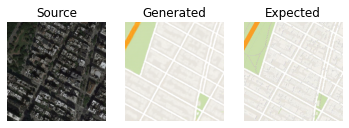

In [10]:
# example of loading a pix2pix model and using it for image to image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint

# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
[X1, X2] = load_real_samples('maps_256.npz')
print('Loaded', X1.shape, X2.shape)
# load model
model = load_model('model_076720.h5')
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

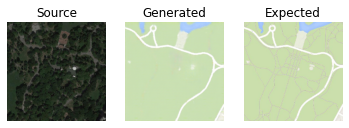

In [11]:
model = load_model('model_098640.h5')
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

Сгенерированные изображения примерно через 50 тренировочных эпох начинают выглядеть очень реалистично и качество остается хорошим до конца тренировочного процесса.

А теперь используем нашу модель для преобразования чёрно-белых картинок в цветные. Будем использовать датасет Сityscapes. Для парности - создаем их чёрно-белые варианты с помощью функции tf.image.rgb_to_grayscale().

In [ ]:
! wget https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/cityscapes.tar.gz

Задача не решена.

Список использованных ресурсов:

1) Ход решения базируется на статье Джейсона Браунли [https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/]

